In [2]:
import sys, os
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)

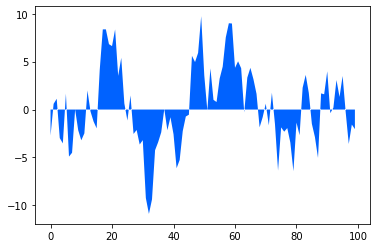

In [3]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)
#Assuming 0 mean
ar1_sample = np.zeros(100)

# Set our first number to a random value with expected mean of 0 and standard deviation of 2.5
ar1_sample[0] += np.random.normal(loc=0, scale=2.5, size=1)

# Set every value thereafter as 0.7 * the last term plus a random error
for t in time[1:]:
    ar1_sample[t] = (0.7 * ar1_sample[t-1]) + np.random.normal(loc=0, scale=2.5, size=1)

plt.fill_between(time,ar1_sample)

In [4]:
# using ARMA model from statsmodel package
model = sm.tsa.ARMA(ar1_sample, (1, 0)).fit(trend='nc', disp=0)
model.params

C:\Users\Vikki\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


array([0.73389528])

In [5]:
# create autocorrelated data
np.random.seed(112)
# Mean is again 0
ar2_sample = np.zeros(100)
# Set first two values to random values with expected mean of 0 and standard deviation of 2.5
ar2_sample[0:2] += np.random.normal(loc=0, scale=2.5, size=2)
# Set future values as 0.3 times the prior value and 0.3 times value two prior
for t in time[2:]:
    ar2_sample[t] = (0.3 * ar2_sample[t-1]) + (0.3 * ar2_sample[t-2]) + np.random.normal(loc=0, scale=2.5, size=1)

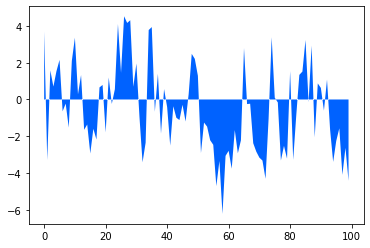

In [6]:
plt.fill_between(time,ar2_sample)

In [7]:
# Again running statsmodel ARMA to predict parameters for generated data
model = sm.tsa.ARMA(ar2_sample, (2, 0)).fit(trend='nc', disp=0)
model.params

array([0.36737486, 0.2445391 ])

In [8]:
# Below is function to help in generating different series
from statsmodels.tsa.arima_process import arma_generate_sample

arparams = np.array([0.3,0.3])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

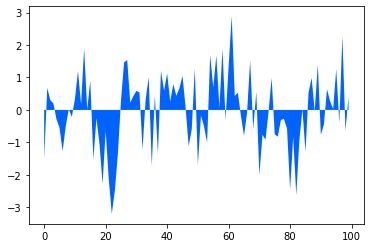

In [9]:
plt.fill_between(time,y)

In [10]:
# Again running statsmodel ARMA to predict parameters for generated data
model = sm.tsa.ARMA(y, (2, 0)).fit(trend='nc', disp=0)
model.params

array([0.17219694, 0.31820738])

In [11]:
# reproducibility
np.random.seed(12)

# create autocorrelated data
time = np.arange(100)
#mean 0
ma1_sample = np.zeros(100)
#create vector of random normally distributed errors
error = np.random.normal(loc=0, scale=2.5, size=100)
# set first value to one of the random errors
ma1_sample[0] += error[0]

#set future values to 0.4 times error of prior value plus the current error term
for t in time[1:]:
    ma1_sample[t] = (0.4 * error[t-1]) + error[t]

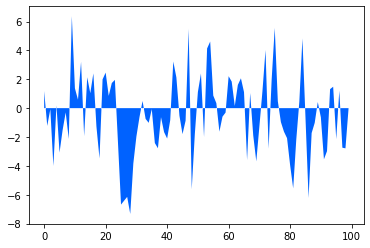

In [12]:
plt.fill_between(time,ma1_sample)

In [13]:
# find model params for generated sample 
model = sm.tsa.ARMA(ma1_sample, (0, 1)).fit(trend='nc', disp=0)
model.params

array([0.3427465])

In [14]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)
ma2_sample = np.zeros(100)
error = np.random.normal(loc=0, scale=2.5, size=100)
ma2_sample[0:2] = error[0:2]
#regress future values on linear functino of prior two errors plus current error
for t in time[2:]:
    ma2_sample[t] = (0.4 * error[t-1]) + (-0.4 * error[t-2]) + error[t]

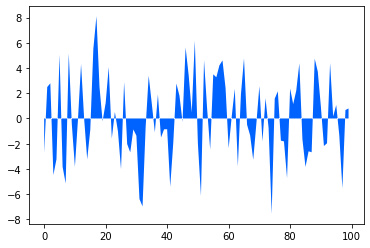

In [15]:
plt.fill_between(time,ma2_sample)

In [16]:
# find model params for generated sample 
model = sm.tsa.ARMA(ma2_sample, (0, 2)).fit(trend='nc', disp=0)
model.params

array([ 0.4594762 , -0.41302148])

In [17]:
# Below is function to help in generating different series
np.random.seed(123)
arparams = np.array([0])
maparams = np.array([0.4,-0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

In [18]:
# Just to show we came up with a model that is approximately ar(1) with phi = 0.7
# We will get back to modeling

model = sm.tsa.ARMA(y, (0, 2)).fit(trend='nc', disp=0)
model.params

array([ 0.4595684 , -0.41054157])

# The Autocorrelation Function (ACF)

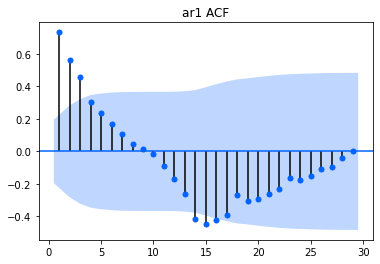

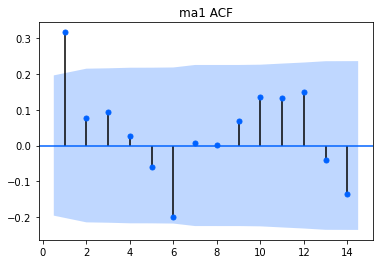

In [23]:
fig = sm.tsa.graphics.plot_acf(ar1_sample, lags=range(1,30), alpha=0.05,title = 'ar1 ACF')
fig = sm.tsa.graphics.plot_acf(ma1_sample, lags=range(1,15), alpha=0.05,title = 'ma1 ACF')

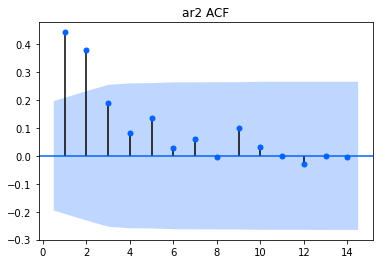

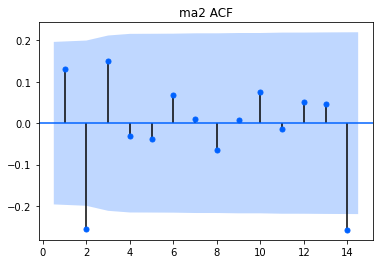

In [24]:
fig = sm.tsa.graphics.plot_acf(ar2_sample, lags=range(1,15), alpha=0.05,title = 'ar2 ACF')
fig = sm.tsa.graphics.plot_acf(ma2_sample, lags=range(1,15), alpha=0.05,title = 'ma2 ACF')

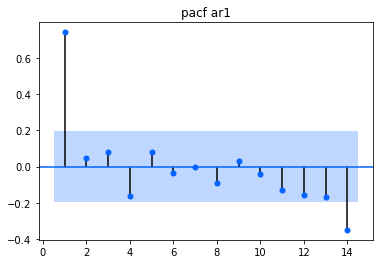

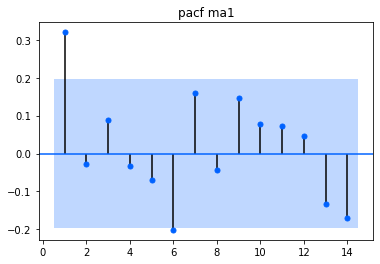

In [25]:

fig = sm.tsa.graphics.plot_pacf(ar1_sample, lags=range(1,15), alpha=0.05, title = 'pacf ar1')
fig = sm.tsa.graphics.plot_pacf(ma1_sample, lags=range(1,15), alpha=0.05, title = 'pacf ma1')

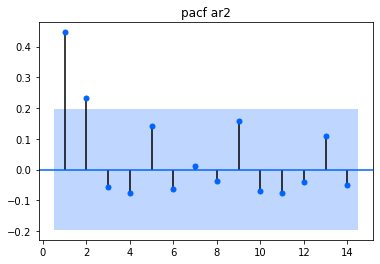

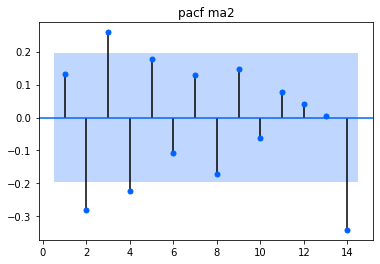

In [26]:
fig = sm.tsa.graphics.plot_pacf(ar2_sample, lags=range(1,15), alpha=0.05, title = 'pacf ar2')
fig = sm.tsa.graphics.plot_pacf(ma2_sample, lags=range(1,15), alpha=0.05, title = 'pacf ma2')

In [27]:
# get data
path_to_file = "./"
auto_1 = pd.read_csv(path_to_file + "auto_1.csv")
auto_2 = pd.read_csv(path_to_file + "auto_2.csv")

In [32]:
# time component
mytime = np.arange(len(auto_1))
mytime

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [33]:
auto_1 = auto_1.values.reshape(-1)
auto_2 = auto_2.values.reshape(-1)

array([-1.92419112,  0.97061766,  1.21506365,  0.83324931,  2.59050053,
        1.03627041,  1.68038947, -0.26893484, -1.01630855,  0.2410608 ,
        0.03503589, -0.50473707, -0.1740015 , -0.98927412,  0.44226102,
       -1.29172881,  0.21620959,  0.19408232, -0.7998987 , -0.87842011,
       -0.5857214 ,  0.5717601 ,  0.20910964,  0.42909942, -1.50844037,
        0.36422655, -0.89842706, -0.42580247, -0.47389979, -1.62607743,
       -0.39706236, -2.17173465, -1.75995941, -1.75985569, -2.09113191,
       -2.55127713, -2.45983353, -2.80987532, -3.17139773, -2.44413033,
       -2.76167897, -2.42096855, -1.34979146, -1.69517221, -2.04077109,
       -0.79767029, -2.45521039, -1.99115555, -2.62363424, -0.79378472,
       -2.55666947, -2.30001458, -2.0056788 , -0.1504847 , -1.39990581,
       -2.85435054, -3.04038375, -1.97730637, -1.82453892, -2.3614855 ,
       -1.9880322 , -2.4440171 , -3.20921403, -0.57172417, -2.01016775,
       -1.38929516, -1.96916114, -3.99689   , -1.30670759, -1.74

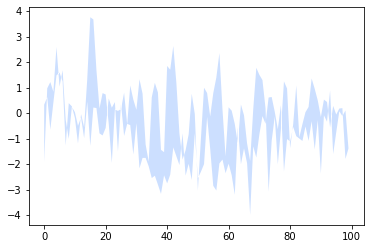

In [36]:
plt.fill_between(mytime,auto_1,auto_2,alpha = 0.2)

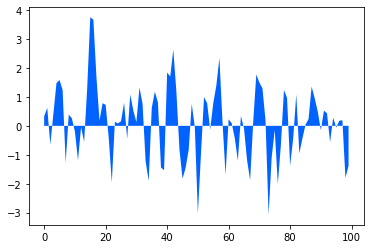

In [37]:
plt.fill_between(mytime,auto_2)